In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Here is the example in [seaborn](https://seaborn.pydata.org/introduction.html) documentation.

In [4]:
sns.set()

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


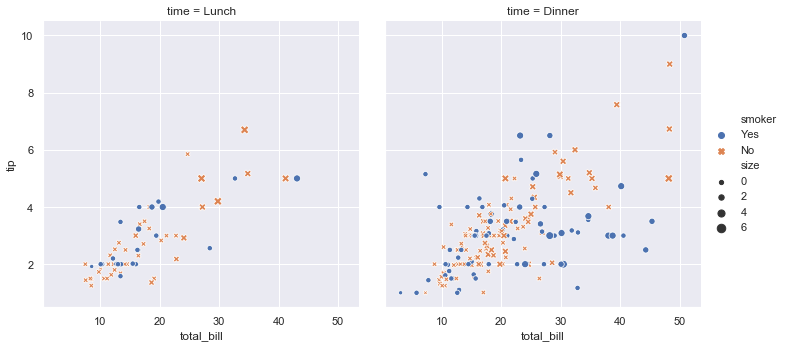

In [4]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)

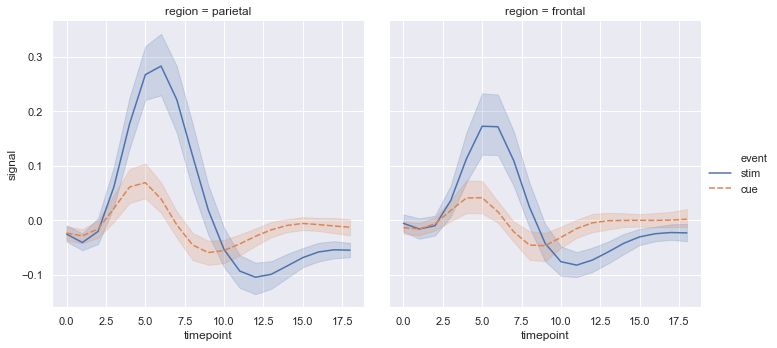

In [5]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

In [6]:
data=sns.load_dataset("flights").pivot("month","year","passengers") 
data.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


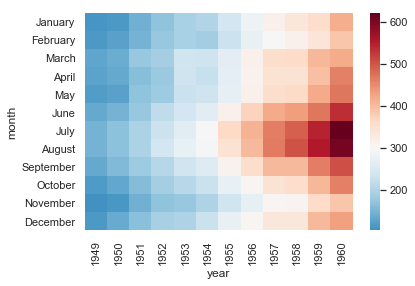

In [7]:
sns.heatmap(data=data, cmap="RdBu_r", center=300, annot=False)

## 3. Pairplot

`pairplot` 主要展现的是变量两两之间的关系（线性或非线性，有无较为明显的相关关系)。

```
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
```

In [10]:
# load iris data 鸢尾花数据
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


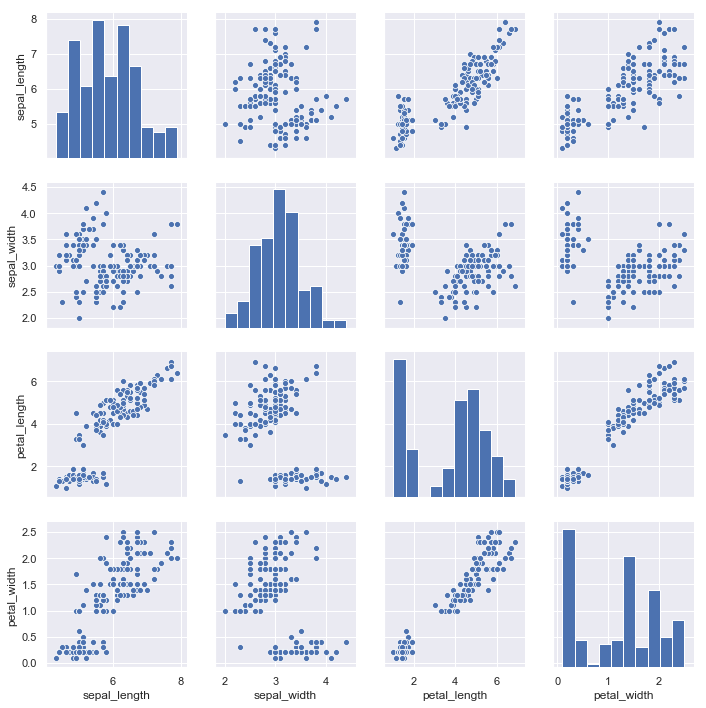

In [9]:
sns.pairplot(data = iris)

__注意__: __对角线__上是各个属性的直方图（分布图），而__非对角线__上是两个不同属性之间的相关图

```pairplot``` has the following parameters:
- `kind`：用于控制非对角线上的图的类型，可选"`scatter`"与"`reg`"
- `diag_kind`：控制对角线上的图的类型，可选"`hist`"与"`kde`"
- `hue`：针对某一字段进行分类
- `palette`：控制色调
- `markers`：控制散点的样式
- `vars`, `x_vars`, `y_vars`：选择数据中的特定字段，以list形式传入
- `plot_kws`：用于控制非对角线上的图的样式
- `diag_kws`：用于控制对角线上图的样式

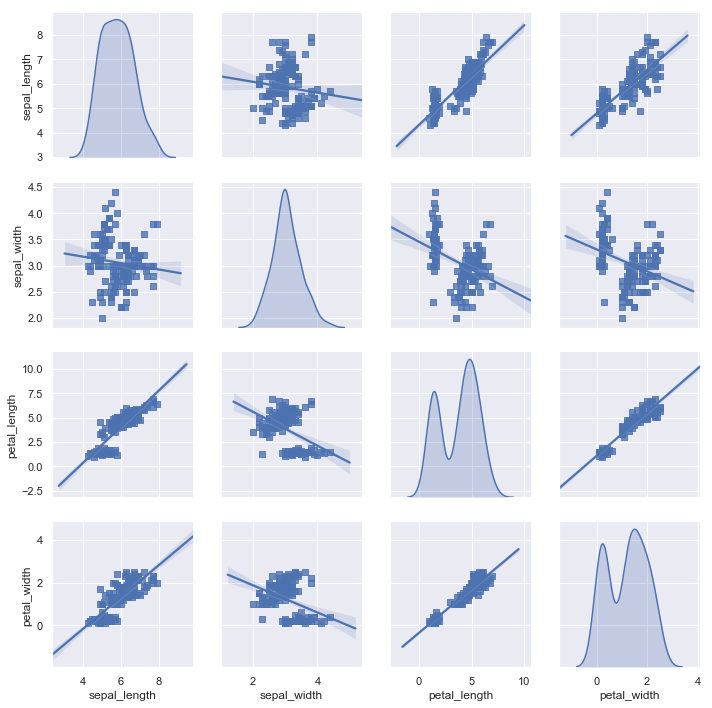

In [25]:
sns.pairplot(iris, kind = "reg", diag_kind = "kde", palette="husl", markers = ['s'],)

将 `kind` 参数设置为 "`reg`" 会为非对角线上的散点图拟合出一条回归直线，更直观地显示变量之间的关系

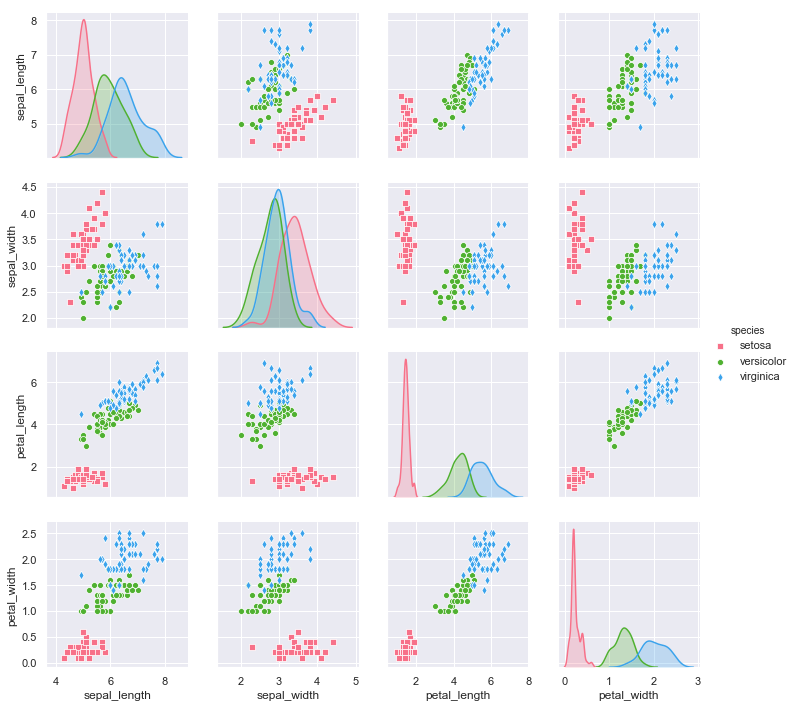

In [19]:
sns.pairplot(iris, hue = "species", palette="husl", markers = ['s', 'o', 'd'])

当我们想单独研究某两个（或多个）变量的关系时，我们只需要通过`vars`参数指定你想研究的变量, 比如：

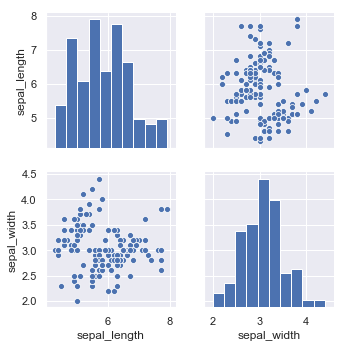

In [20]:
sns.pairplot(iris, vars=["sepal_length", "sepal_width"]) 

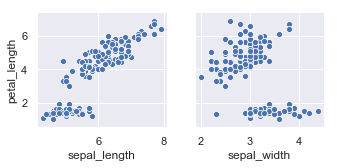

In [23]:
# 用x_vars和 y_vars参数指定
# 需要注意的是，x_vars和y_vars要同时指定, x_vars and y_vars can have different sizes
sns.pairplot(iris, x_vars=["sepal_length", "sepal_width"], y_vars=["petal_length"]) 

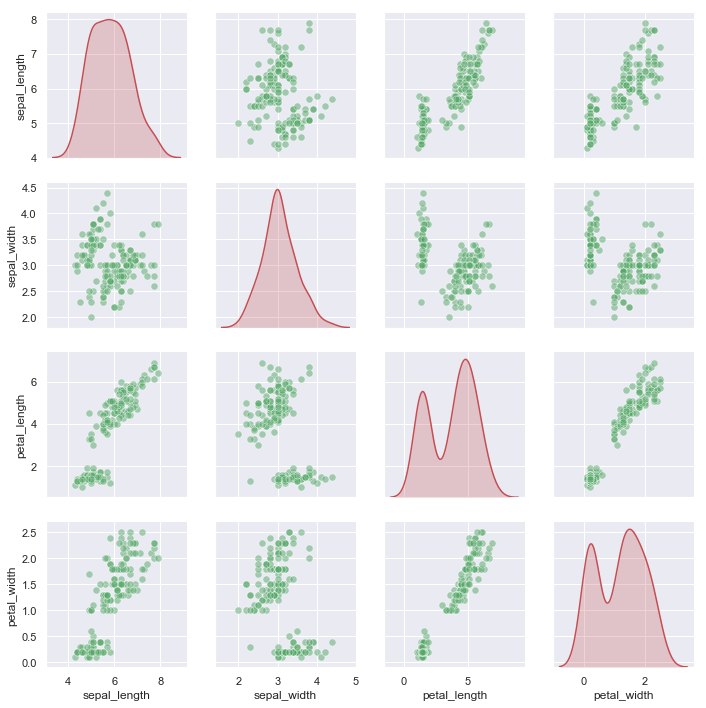

In [27]:
sns.pairplot(iris, diag_kind = 'kde',
             plot_kws=dict(s=50, edgecolor="w", color="g", alpha=.5),
             diag_kws=dict(shade=True, color="r"))

## 4. Boxplot

箱形图（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。它能显示出一组数据的最大值、最小值、中位数及上下四分位数。

```
seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
```

In [28]:
# load iris data 鸢尾花数据
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


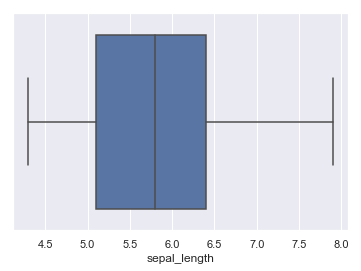

In [29]:
sns.boxplot(x = 'sepal_length', data = iris)

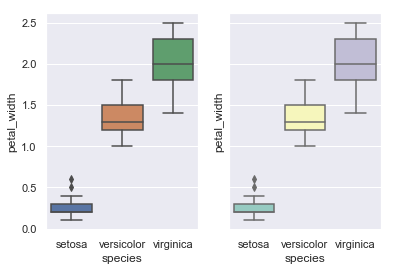

In [32]:
fig,axes = plt.subplots(1,2,sharey=True)
sns.boxplot(x="species", y="petal_width", data=iris, ax=axes[0]) #左图
sns.boxplot(x="species", y="petal_width", data=iris, palette="Set3", ax=axes[1]) # Use palette to change color

## 5. Violinplot

`violinplot`与`boxplot`扮演类似的角色，它显示了定量数据在一个（或多个）分类变量的多个层次上的分布，这些分布可以进行比较。不像箱形图中所有绘图组件都对应于实际数据点，小提琴绘图以基础分布的核密度估计为特征。

```
seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
```

In [34]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


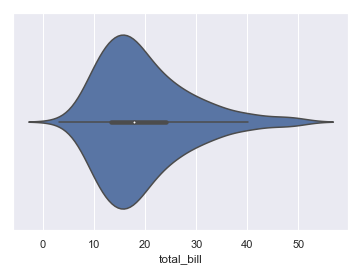

In [35]:
sns.violinplot(x=tips["total_bill"])

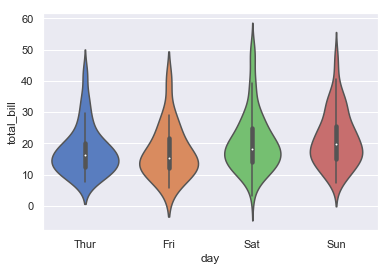

In [41]:
sns.violinplot(x="day", y="total_bill", data=tips, palette="muted")

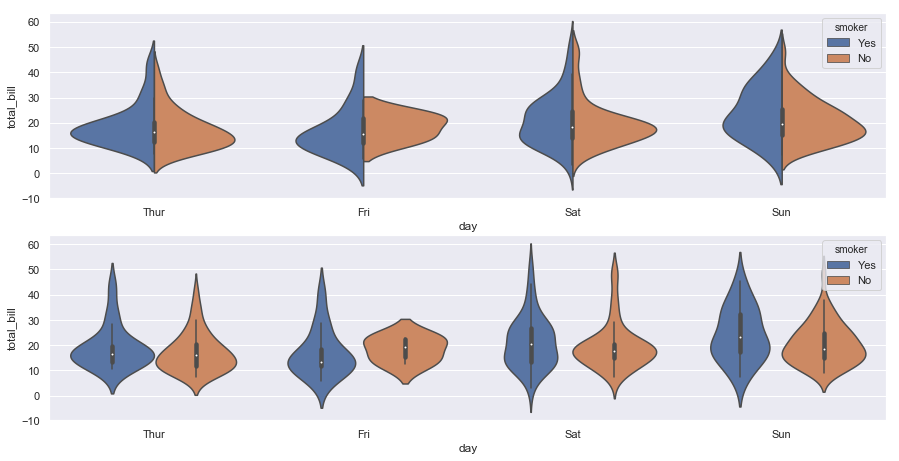

In [46]:
fig, axes = plt.subplots(2,1, figsize=(15,7.5))  
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", split=True,ax=axes[0]) #上图，拆分后的图
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", ax=axes[1])  #下图

`scale`：该参数用于缩放每把小提琴的宽度，有“`area`”, “`count`”, “`width`”三种方式

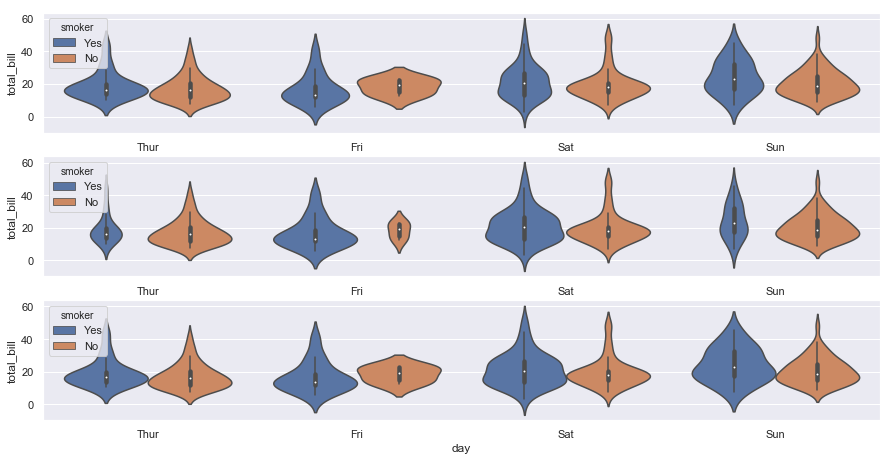

In [47]:
fig, axes = plt.subplots(3,1, figsize=(15,7.5))  
#如果为"area"，每把小提琴将有相同的面积(上图)
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", scale="area", ax=axes[0])
#如果为"count"，小提琴的宽度将根据该小组中观察的数量来缩放（中图）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", scale="count", ax=axes[1])
#如果为"age"，每把小提琴将有相同的宽度（下图）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", scale="width", ax=axes[2])

`inner`：控制violinplot内部数据点的表示，有“`box`”, “`quartile`”, “`point`”, “`stick`”四种方式。

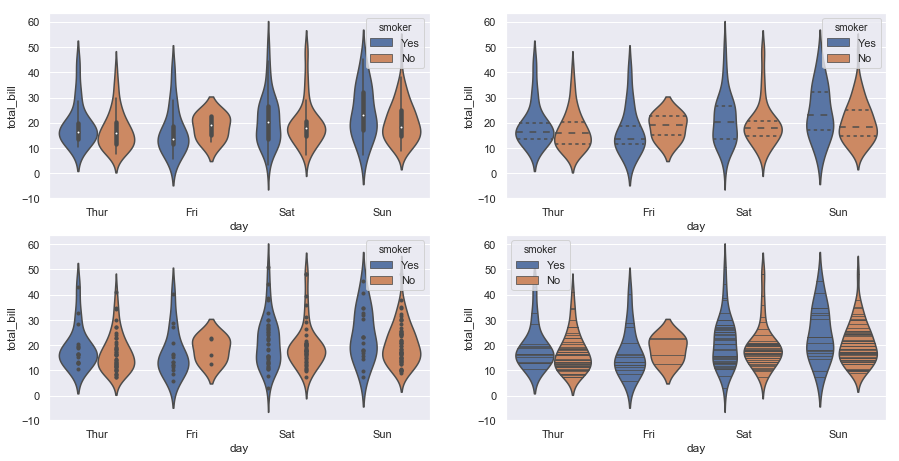

In [49]:
fig, axes = plt.subplots(2,2, figsize=(15,7.5))  
#钢琴图内显示箱型图（左上）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", inner="box", ax=axes[0, 0])
#钢琴图内显示四分位数线（右上）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", inner="quartile", ax=axes[0, 1])
#钢琴图内显示具体数据点（左下）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", inner="point", ax=axes[1, 0])
#钢琴图内显示具体数据棒（右下）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", inner="stick", ax=axes[1, 1])

## 6. lmplot

`lmplot`是用来绘制回归图的，通过`lmplot`我们可以直观地总览数据的内在关系

```
seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
```

In [54]:
sns.set(font_scale=1.5, style="white", color_codes=True)

In [51]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


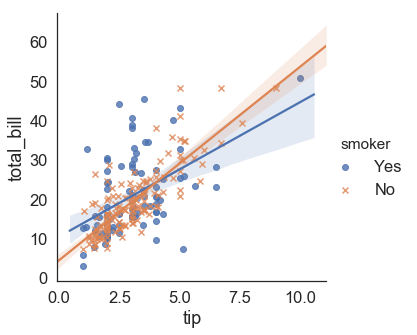

In [57]:
sns.lmplot(x='tip', y='total_bill', hue="smoker", data=tips, markers=["o", "x"])

`col`: 根据所指定属性在列上分类

`row`: 根据所指定属性在行上分类

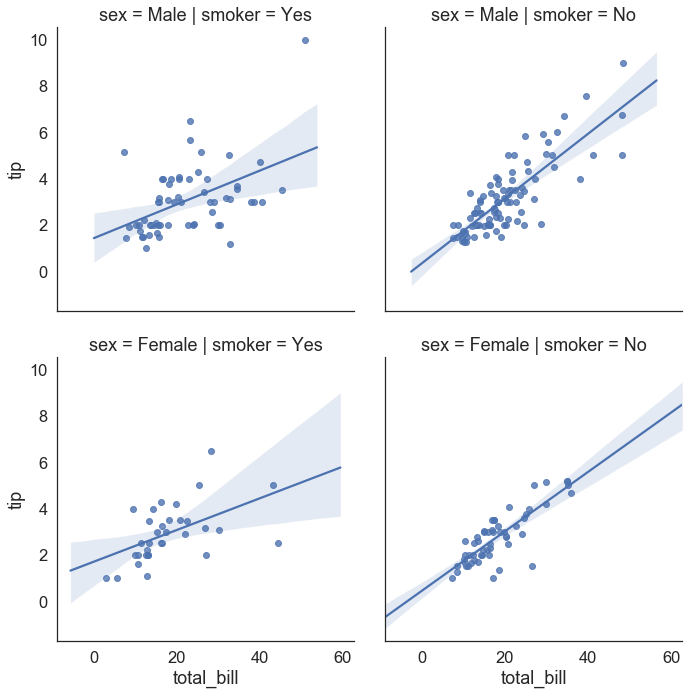

In [59]:
sns.lmplot(x="total_bill", y="tip", data=tips, row="sex", col="smoker")

`order`: 控制进行回归的幂次（一次以上即是多项式回归）

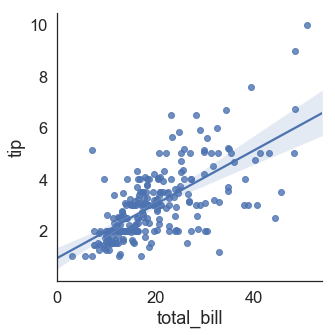

In [62]:
sns.lmplot(x="total_bill", y="tip", data=tips, order=1) # linear regression

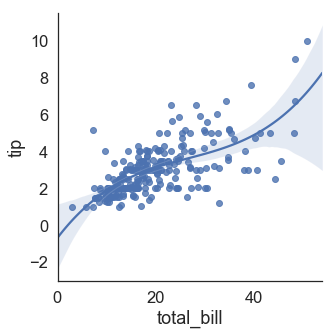

In [64]:
sns.lmplot(x="total_bill", y="tip", data=tips, order=3) # cubic regression